# Demo of Neural Tangent Transfer (NTT) using Lenet-300-100 on MNIST.




Our experiment contains two phases:

1. In the **NTT optimization phase**, we use label-free data to learn the sparse NTT initialization.
2. In the **supervised learning phase**, where we reveal the labels and perform supervised learning using NTT initialization.

In this notebook, we use Lenet-300-100 architecture on MNIST to demonstrate the usage of NTT. Concretely, we use NTT to yield a layerwise sparse network using label-free data, and then use this *learned* sparse initialization in the subsequent image classification task. We compare the supervised results with randomly initialized sparse network.



In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from jax import random
import numpy as np
from nt_transfer import *
import numpy as onp
from nt_transfer.nn_models import model_dict
from nt_transfer.plot_tools import *
import matplotlib.ticker as ticker

# Phase I: Use NTT to initialize a layerwise sparse MLP with 3% non-zero weight 

In [2]:
# The hyper-parameters for NTT
gen_kwargs = dict(dataset_str =  'mnist',
                  model_str = 'mlp_lenet',               
                  NN_DENSITY_LEVEL_LIST = [0.03], # the fraction of weight remainining
                  OPTIMIZER_STR = 'adam', # the optimizer
                  NUM_RUNS = 2, # two independent runs (note that in our paper, we use NUM_RUNS = 5) 
                  NUM_EPOCHS  = 20, # number of epochs
                  BATCH_SIZE  = 64,  # batch size
                  STEP_SIZE = 5e-4,  # SGD step size
                  MASK_UPDATE_FREQ = 100, # mask update frequency
                  LAMBDA_KER_DIST = 1e-3, # the strength constant for NTK distance used in NTT loss function
                  LAMBDA_L2_REG = 1e-4, # the l2 regularization constant
                  SAVE_BOOL = True, 
                  save_dir = './../ntt_results/')

## Do gradient descent 

In [5]:
model = nt_transfer_model(**gen_kwargs, instance_input_shape = [784])
_, _, nt_trans_vali_all_sparsities_all_runs = model.optimize()

2020-06-13 12:11:54,605 Before transfer: trans dist 7.737 | ntk dist 6439.033 | targ dist 1.022 | l2 pentalty 82.942 | nn density 0.03
2020-06-13 12:11:58,263 run: 01/02 | iter 0100/18720 | trans. dist 4.686 | ntk dist 3674.961 | targ. dist 0.732 | l2 83.634 | nn density 0.03 | time 3.56 [s] | expected finish time 2020-06-13 12:34:06.419477
2020-06-13 12:11:59,382 run: 01/02 | iter 0200/18720 | trans. dist 2.305 | ntk dist 1599.063 | targ. dist 0.395 | l2 93.044 | nn density 0.03 | time 1.02 [s] | expected finish time 2020-06-13 12:18:19.109222
2020-06-13 12:12:00,498 run: 01/02 | iter 0300/18720 | trans. dist 2.144 | ntk dist 1522.176 | targ. dist 0.333 | l2 86.438 | nn density 0.03 | time 1.02 [s] | expected finish time 2020-06-13 12:18:19.001516
2020-06-13 12:12:01,614 run: 01/02 | iter 0400/18720 | trans. dist 2.014 | ntk dist 1443.394 | targ. dist 0.284 | l2 85.940 | nn density 0.03 | time 1.02 [s] | expected finish time 2020-06-13 12:18:18.906177
2020-06-13 12:12:02,732 run: 01/0

2020-06-13 12:12:41,925 run: 01/02 | iter 4000/18720 | trans. dist 0.760 | ntk dist 520.771 | targ. dist 0.113 | l2 37.928 | nn density 0.03 | time 1.02 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:12:43,050 run: 01/02 | iter 4100/18720 | trans. dist 0.787 | ntk dist 551.298 | targ. dist 0.111 | l2 37.553 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:12:44,175 run: 01/02 | iter 4200/18720 | trans. dist 0.740 | ntk dist 503.571 | targ. dist 0.112 | l2 37.266 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:12:45,298 run: 01/02 | iter 4300/18720 | trans. dist 0.760 | ntk dist 526.950 | targ. dist 0.108 | l2 37.285 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:12:46,422 run: 01/02 | iter 4400/18720 | trans. dist 0.757 | ntk dist 524.862 | targ. dist 0.110 | l2 36.826 | nn density 0.03 | time 1.03 [s] | expected fini

2020-06-13 12:13:26,943 run: 01/02 | iter 8000/18720 | trans. dist 0.646 | ntk dist 444.847 | targ. dist 0.094 | l2 32.211 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:13:28,070 run: 01/02 | iter 8100/18720 | trans. dist 0.650 | ntk dist 448.514 | targ. dist 0.095 | l2 32.088 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:13:29,198 run: 01/02 | iter 8200/18720 | trans. dist 0.647 | ntk dist 446.919 | targ. dist 0.093 | l2 32.105 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:13:30,326 run: 01/02 | iter 8300/18720 | trans. dist 0.638 | ntk dist 441.607 | targ. dist 0.089 | l2 32.069 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:13:31,453 run: 01/02 | iter 8400/18720 | trans. dist 0.676 | ntk dist 474.555 | targ. dist 0.095 | l2 32.056 | nn density 0.03 | time 1.03 [s] | expected fini

2020-06-13 12:14:12,041 run: 01/02 | iter 12000/18720 | trans. dist 0.628 | ntk dist 435.271 | targ. dist 0.088 | l2 31.446 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:13,168 run: 01/02 | iter 12100/18720 | trans. dist 0.630 | ntk dist 438.348 | targ. dist 0.087 | l2 31.433 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:14,295 run: 01/02 | iter 12200/18720 | trans. dist 0.627 | ntk dist 435.339 | targ. dist 0.087 | l2 31.325 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:15,423 run: 01/02 | iter 12300/18720 | trans. dist 0.626 | ntk dist 436.081 | targ. dist 0.085 | l2 31.464 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:16,550 run: 01/02 | iter 12400/18720 | trans. dist 0.633 | ntk dist 440.914 | targ. dist 0.087 | l2 31.363 | nn density 0.03 | time 1.03 [s] | expected

2020-06-13 12:14:57,133 run: 01/02 | iter 16000/18720 | trans. dist 0.632 | ntk dist 439.906 | targ. dist 0.089 | l2 30.990 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:58,261 run: 01/02 | iter 16100/18720 | trans. dist 0.627 | ntk dist 436.020 | targ. dist 0.088 | l2 30.996 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:14:59,388 run: 01/02 | iter 16200/18720 | trans. dist 0.627 | ntk dist 436.714 | targ. dist 0.087 | l2 31.009 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:00,517 run: 01/02 | iter 16300/18720 | trans. dist 0.626 | ntk dist 435.608 | targ. dist 0.087 | l2 30.918 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:01,644 run: 01/02 | iter 16400/18720 | trans. dist 0.625 | ntk dist 433.857 | targ. dist 0.088 | l2 30.847 | nn density 0.03 | time 1.03 [s] | expected

2020-06-13 12:15:41,987 run: 02/02 | iter 1100/18720 | trans. dist 1.589 | ntk dist 1118.422 | targ. dist 0.201 | l2 80.598 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:43,113 run: 02/02 | iter 1200/18720 | trans. dist 1.499 | ntk dist 1041.931 | targ. dist 0.192 | l2 79.296 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:44,240 run: 02/02 | iter 1300/18720 | trans. dist 1.461 | ntk dist 1022.146 | targ. dist 0.184 | l2 76.226 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:45,367 run: 02/02 | iter 1400/18720 | trans. dist 1.411 | ntk dist 976.930 | targ. dist 0.187 | l2 74.115 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:15:46,494 run: 02/02 | iter 1500/18720 | trans. dist 1.363 | ntk dist 945.506 | targ. dist 0.177 | l2 72.272 | nn density 0.03 | time 1.03 [s] | expected f

2020-06-13 12:16:27,090 run: 02/02 | iter 5100/18720 | trans. dist 0.901 | ntk dist 640.031 | targ. dist 0.118 | l2 42.721 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:16:28,220 run: 02/02 | iter 5200/18720 | trans. dist 0.880 | ntk dist 618.918 | targ. dist 0.120 | l2 42.259 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:16:29,349 run: 02/02 | iter 5300/18720 | trans. dist 0.875 | ntk dist 615.746 | targ. dist 0.118 | l2 42.162 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:16:30,479 run: 02/02 | iter 5400/18720 | trans. dist 0.893 | ntk dist 637.878 | targ. dist 0.116 | l2 41.829 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:16:31,608 run: 02/02 | iter 5500/18720 | trans. dist 0.879 | ntk dist 624.888 | targ. dist 0.115 | l2 41.561 | nn density 0.03 | time 1.03 [s] | expected fini

2020-06-13 12:17:12,270 run: 02/02 | iter 9100/18720 | trans. dist 0.826 | ntk dist 596.963 | targ. dist 0.105 | l2 37.093 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:13,400 run: 02/02 | iter 9200/18720 | trans. dist 0.795 | ntk dist 569.510 | targ. dist 0.102 | l2 37.082 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:14,529 run: 02/02 | iter 9300/18720 | trans. dist 0.817 | ntk dist 590.383 | targ. dist 0.102 | l2 37.223 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:15,658 run: 02/02 | iter 9400/18720 | trans. dist 0.800 | ntk dist 574.406 | targ. dist 0.103 | l2 36.776 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:16,788 run: 02/02 | iter 9500/18720 | trans. dist 0.808 | ntk dist 583.511 | targ. dist 0.102 | l2 36.714 | nn density 0.03 | time 1.03 [s] | expected fini

2020-06-13 12:17:57,443 run: 02/02 | iter 13100/18720 | trans. dist 0.772 | ntk dist 554.369 | targ. dist 0.100 | l2 35.271 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:58,572 run: 02/02 | iter 13200/18720 | trans. dist 0.768 | ntk dist 549.703 | targ. dist 0.101 | l2 35.299 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:17:59,701 run: 02/02 | iter 13300/18720 | trans. dist 0.772 | ntk dist 553.027 | targ. dist 0.101 | l2 35.355 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:00,833 run: 02/02 | iter 13400/18720 | trans. dist 0.766 | ntk dist 549.753 | targ. dist 0.099 | l2 35.341 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:01,962 run: 02/02 | iter 13500/18720 | trans. dist 0.778 | ntk dist 557.247 | targ. dist 0.104 | l2 35.201 | nn density 0.03 | time 1.03 [s] | expected

2020-06-13 12:18:42,594 run: 02/02 | iter 17100/18720 | trans. dist 0.772 | ntk dist 556.529 | targ. dist 0.100 | l2 34.650 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:43,722 run: 02/02 | iter 17200/18720 | trans. dist 0.757 | ntk dist 546.105 | targ. dist 0.095 | l2 34.628 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:44,851 run: 02/02 | iter 17300/18720 | trans. dist 0.752 | ntk dist 539.840 | targ. dist 0.096 | l2 34.725 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:45,980 run: 02/02 | iter 17400/18720 | trans. dist 0.750 | ntk dist 536.930 | targ. dist 0.098 | l2 34.593 | nn density 0.03 | time 1.03 [s] | expected finish time 2020-06-13 12:18:19.508200
2020-06-13 12:18:47,108 run: 02/02 | iter 17500/18720 | trans. dist 0.749 | ntk dist 537.860 | targ. dist 0.096 | l2 34.582 | nn density 0.03 | time 1.03 [s] | expected

## Visualize the NTT loss function.

Recall that the NTT loss function constaints two terms, the **target distance** and the **NTK distance**. We visualize both terms.

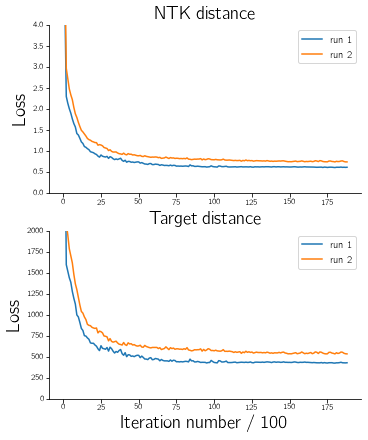

In [6]:
axis_font = 18

fig = plt.figure(constrained_layout=True, figsize=(5, 6))

gs = fig.add_gridspec(10, 12)
ax1 = fig.add_subplot(gs[:5, :])
        
# three trials of target distance
ax1.plot(nt_trans_vali_all_sparsities_all_runs[0][0][:,0], label = 'run 1');
ax1.plot(nt_trans_vali_all_sparsities_all_runs[0][1][:,0], label = 'run 2');
ax1.legend(ncol = 1) 
ax1.set_ylim([0,4])
ax1.set_title('NTK distance', fontsize = axis_font)
ax1.set_ylabel('Loss', fontsize = axis_font)
ax1 = simpleaxis(ax1)

ax2 = fig.add_subplot(gs[5:, :])
ax2.plot(nt_trans_vali_all_sparsities_all_runs[0][0][:,1], label =  'run 1');
ax2.plot(nt_trans_vali_all_sparsities_all_runs[0][1][:,1], label =  'run 2');
ax2.legend(ncol = 1) 
ax2.set_ylim([0,2000])
ax2.set_title('Target distance', fontsize = axis_font)
ax2.set_ylabel('Loss', fontsize = axis_font)
ax2.set_xlabel('Iteration number / 100', fontsize = axis_font)
ax2 = simpleaxis(ax2)

# for a in ntk_distance_dict.keys():
# ax1.plot(ntk_distance_dict[a][0], label = a)

# Phase II: Supervised learning using sparse nets

In [7]:
gen_kwargs_supervised = dict(
ntt_file_name = 'mnist_layerwise_prune_mlp_lenet', # the saved result in ntt_results file
dataset_str  = 'mnist', # dataset to use'
sup_density_list = [0.03],  # the density levels to achieve'
OPTIMIZER_STR = 'adam', # optimizer'
EXPLOITATION_NUM_EPOCHS = 50, #number of training epochs'
EXPLOITATION_BATCH_SIZE  = 64, # number of samples in a minibatch'
STEP_SIZE = 1e-3, # learning step-size'
REG = 1e-8, # l2 regularization constant'
EXPLOIT_TRAIN_DATASET_FRACTION = 0.1, # the fraction of training data used as validation data'
RECORD_ACC_FREQ = 100, # frequency for saving the training and testing result'  
save_supervised_result_bool = True
)


In [8]:
model = exploit_model(ntt_file_name = gen_kwargs_supervised['ntt_file_name'], ntt_saved_path = './../ntt_results/', supervised_result_path = './../supervised_results/')

# Proposed: NTT sparse initialization
sup_learning_results_ntt_init = model.supervised_optimization(wiring_str = 'trans',  ** gen_kwargs_supervised)

2020-06-13 12:20:03,134 NN density 0.03 | Run 001/002 | Iteration 001/42200 | Train acc 4.52% | Test acc 4.38%
2020-06-13 12:20:03,251 NN density 0.03 | Run 001/002 | Iteration 101/42200 | Train acc 75.52% | Test acc 75.65%
2020-06-13 12:20:03,351 NN density 0.03 | Run 001/002 | Iteration 201/42200 | Train acc 85.46% | Test acc 85.31%
2020-06-13 12:20:03,451 NN density 0.03 | Run 001/002 | Iteration 301/42200 | Train acc 87.81% | Test acc 88.18%
2020-06-13 12:20:03,552 NN density 0.03 | Run 001/002 | Iteration 401/42200 | Train acc 89.54% | Test acc 89.58%
2020-06-13 12:20:03,652 NN density 0.03 | Run 001/002 | Iteration 501/42200 | Train acc 90.37% | Test acc 90.56%
2020-06-13 12:20:03,753 NN density 0.03 | Run 001/002 | Iteration 601/42200 | Train acc 91.15% | Test acc 91.29%
2020-06-13 12:20:03,853 NN density 0.03 | Run 001/002 | Iteration 701/42200 | Train acc 91.31% | Test acc 91.48%
2020-06-13 12:20:03,953 NN density 0.03 | Run 001/002 | Iteration 801/42200 | Train acc 92.17% | T

2020-06-13 12:20:10,380 NN density 0.03 | Run 001/002 | Iteration 7201/42200 | Train acc 97.61% | Test acc 96.42%
2020-06-13 12:20:10,480 NN density 0.03 | Run 001/002 | Iteration 7301/42200 | Train acc 97.56% | Test acc 96.28%
2020-06-13 12:20:10,581 NN density 0.03 | Run 001/002 | Iteration 7401/42200 | Train acc 97.85% | Test acc 96.44%
2020-06-13 12:20:10,682 NN density 0.03 | Run 001/002 | Iteration 7501/42200 | Train acc 97.98% | Test acc 96.49%
2020-06-13 12:20:10,782 NN density 0.03 | Run 001/002 | Iteration 7601/42200 | Train acc 97.81% | Test acc 96.62%
2020-06-13 12:20:10,882 NN density 0.03 | Run 001/002 | Iteration 7701/42200 | Train acc 98.00% | Test acc 96.42%
2020-06-13 12:20:10,982 NN density 0.03 | Run 001/002 | Iteration 7801/42200 | Train acc 97.91% | Test acc 96.50%
2020-06-13 12:20:11,083 NN density 0.03 | Run 001/002 | Iteration 7901/42200 | Train acc 97.98% | Test acc 96.49%
2020-06-13 12:20:11,183 NN density 0.03 | Run 001/002 | Iteration 8001/42200 | Train acc

2020-06-13 12:20:17,623 NN density 0.03 | Run 001/002 | Iteration 14401/42200 | Train acc 98.93% | Test acc 96.69%
2020-06-13 12:20:17,724 NN density 0.03 | Run 001/002 | Iteration 14501/42200 | Train acc 98.76% | Test acc 96.89%
2020-06-13 12:20:17,827 NN density 0.03 | Run 001/002 | Iteration 14601/42200 | Train acc 98.91% | Test acc 96.89%
2020-06-13 12:20:17,928 NN density 0.03 | Run 001/002 | Iteration 14701/42200 | Train acc 98.89% | Test acc 96.74%
2020-06-13 12:20:18,029 NN density 0.03 | Run 001/002 | Iteration 14801/42200 | Train acc 99.00% | Test acc 96.81%
2020-06-13 12:20:18,131 NN density 0.03 | Run 001/002 | Iteration 14901/42200 | Train acc 98.80% | Test acc 96.56%
2020-06-13 12:20:18,232 NN density 0.03 | Run 001/002 | Iteration 15001/42200 | Train acc 99.07% | Test acc 96.81%
2020-06-13 12:20:18,332 NN density 0.03 | Run 001/002 | Iteration 15101/42200 | Train acc 99.02% | Test acc 96.85%
2020-06-13 12:20:18,434 NN density 0.03 | Run 001/002 | Iteration 15201/42200 | 

2020-06-13 12:20:24,897 NN density 0.03 | Run 001/002 | Iteration 21601/42200 | Train acc 99.26% | Test acc 96.79%
2020-06-13 12:20:24,998 NN density 0.03 | Run 001/002 | Iteration 21701/42200 | Train acc 99.22% | Test acc 96.82%
2020-06-13 12:20:25,099 NN density 0.03 | Run 001/002 | Iteration 21801/42200 | Train acc 99.39% | Test acc 96.73%
2020-06-13 12:20:25,201 NN density 0.03 | Run 001/002 | Iteration 21901/42200 | Train acc 99.41% | Test acc 96.82%
2020-06-13 12:20:25,303 NN density 0.03 | Run 001/002 | Iteration 22001/42200 | Train acc 99.43% | Test acc 96.78%
2020-06-13 12:20:25,404 NN density 0.03 | Run 001/002 | Iteration 22101/42200 | Train acc 99.50% | Test acc 96.76%
2020-06-13 12:20:25,505 NN density 0.03 | Run 001/002 | Iteration 22201/42200 | Train acc 99.41% | Test acc 96.71%
2020-06-13 12:20:25,606 NN density 0.03 | Run 001/002 | Iteration 22301/42200 | Train acc 99.30% | Test acc 96.78%
2020-06-13 12:20:25,707 NN density 0.03 | Run 001/002 | Iteration 22401/42200 | 

2020-06-13 12:20:32,241 NN density 0.03 | Run 001/002 | Iteration 28801/42200 | Train acc 99.54% | Test acc 96.71%
2020-06-13 12:20:32,343 NN density 0.03 | Run 001/002 | Iteration 28901/42200 | Train acc 99.63% | Test acc 96.80%
2020-06-13 12:20:32,446 NN density 0.03 | Run 001/002 | Iteration 29001/42200 | Train acc 99.70% | Test acc 96.61%
2020-06-13 12:20:32,548 NN density 0.03 | Run 001/002 | Iteration 29101/42200 | Train acc 99.80% | Test acc 96.57%
2020-06-13 12:20:32,651 NN density 0.03 | Run 001/002 | Iteration 29201/42200 | Train acc 99.72% | Test acc 96.65%
2020-06-13 12:20:32,753 NN density 0.03 | Run 001/002 | Iteration 29301/42200 | Train acc 99.50% | Test acc 96.52%
2020-06-13 12:20:32,854 NN density 0.03 | Run 001/002 | Iteration 29401/42200 | Train acc 99.52% | Test acc 96.73%
2020-06-13 12:20:32,956 NN density 0.03 | Run 001/002 | Iteration 29501/42200 | Train acc 99.54% | Test acc 96.59%
2020-06-13 12:20:33,059 NN density 0.03 | Run 001/002 | Iteration 29601/42200 | 

2020-06-13 12:20:39,632 NN density 0.03 | Run 001/002 | Iteration 36001/42200 | Train acc 99.74% | Test acc 96.57%
2020-06-13 12:20:39,736 NN density 0.03 | Run 001/002 | Iteration 36101/42200 | Train acc 99.72% | Test acc 96.61%
2020-06-13 12:20:39,839 NN density 0.03 | Run 001/002 | Iteration 36201/42200 | Train acc 99.74% | Test acc 96.67%
2020-06-13 12:20:39,943 NN density 0.03 | Run 001/002 | Iteration 36301/42200 | Train acc 99.80% | Test acc 96.68%
2020-06-13 12:20:40,046 NN density 0.03 | Run 001/002 | Iteration 36401/42200 | Train acc 99.67% | Test acc 96.59%
2020-06-13 12:20:40,149 NN density 0.03 | Run 001/002 | Iteration 36501/42200 | Train acc 99.85% | Test acc 96.62%
2020-06-13 12:20:40,252 NN density 0.03 | Run 001/002 | Iteration 36601/42200 | Train acc 99.85% | Test acc 96.71%
2020-06-13 12:20:40,354 NN density 0.03 | Run 001/002 | Iteration 36701/42200 | Train acc 99.81% | Test acc 96.64%
2020-06-13 12:20:40,456 NN density 0.03 | Run 001/002 | Iteration 36801/42200 | 

2020-06-13 12:20:47,031 NN density 0.03 | Run 002/002 | Iteration 1001/42200 | Train acc 92.80% | Test acc 92.98%
2020-06-13 12:20:47,133 NN density 0.03 | Run 002/002 | Iteration 1101/42200 | Train acc 92.83% | Test acc 93.26%
2020-06-13 12:20:47,235 NN density 0.03 | Run 002/002 | Iteration 1201/42200 | Train acc 93.17% | Test acc 93.38%
2020-06-13 12:20:47,339 NN density 0.03 | Run 002/002 | Iteration 1301/42200 | Train acc 93.31% | Test acc 93.69%
2020-06-13 12:20:47,441 NN density 0.03 | Run 002/002 | Iteration 1401/42200 | Train acc 93.81% | Test acc 93.90%
2020-06-13 12:20:47,543 NN density 0.03 | Run 002/002 | Iteration 1501/42200 | Train acc 94.13% | Test acc 94.16%
2020-06-13 12:20:47,644 NN density 0.03 | Run 002/002 | Iteration 1601/42200 | Train acc 94.28% | Test acc 94.33%
2020-06-13 12:20:47,747 NN density 0.03 | Run 002/002 | Iteration 1701/42200 | Train acc 94.46% | Test acc 94.41%
2020-06-13 12:20:47,850 NN density 0.03 | Run 002/002 | Iteration 1801/42200 | Train acc

2020-06-13 12:20:54,432 NN density 0.03 | Run 002/002 | Iteration 8201/42200 | Train acc 98.15% | Test acc 96.62%
2020-06-13 12:20:54,537 NN density 0.03 | Run 002/002 | Iteration 8301/42200 | Train acc 98.06% | Test acc 96.71%
2020-06-13 12:20:54,641 NN density 0.03 | Run 002/002 | Iteration 8401/42200 | Train acc 98.15% | Test acc 96.68%
2020-06-13 12:20:54,742 NN density 0.03 | Run 002/002 | Iteration 8501/42200 | Train acc 97.98% | Test acc 96.82%
2020-06-13 12:20:54,845 NN density 0.03 | Run 002/002 | Iteration 8601/42200 | Train acc 98.11% | Test acc 96.61%
2020-06-13 12:20:54,949 NN density 0.03 | Run 002/002 | Iteration 8701/42200 | Train acc 98.26% | Test acc 96.89%
2020-06-13 12:20:55,052 NN density 0.03 | Run 002/002 | Iteration 8801/42200 | Train acc 98.09% | Test acc 96.81%
2020-06-13 12:20:55,154 NN density 0.03 | Run 002/002 | Iteration 8901/42200 | Train acc 98.00% | Test acc 96.88%
2020-06-13 12:20:55,257 NN density 0.03 | Run 002/002 | Iteration 9001/42200 | Train acc

2020-06-13 12:21:01,852 NN density 0.03 | Run 002/002 | Iteration 15401/42200 | Train acc 99.09% | Test acc 96.68%
2020-06-13 12:21:01,954 NN density 0.03 | Run 002/002 | Iteration 15501/42200 | Train acc 98.96% | Test acc 96.78%
2020-06-13 12:21:02,058 NN density 0.03 | Run 002/002 | Iteration 15601/42200 | Train acc 99.15% | Test acc 96.92%
2020-06-13 12:21:02,160 NN density 0.03 | Run 002/002 | Iteration 15701/42200 | Train acc 98.94% | Test acc 96.76%
2020-06-13 12:21:02,262 NN density 0.03 | Run 002/002 | Iteration 15801/42200 | Train acc 98.89% | Test acc 96.77%
2020-06-13 12:21:02,363 NN density 0.03 | Run 002/002 | Iteration 15901/42200 | Train acc 98.94% | Test acc 96.85%
2020-06-13 12:21:02,466 NN density 0.03 | Run 002/002 | Iteration 16001/42200 | Train acc 98.93% | Test acc 96.89%
2020-06-13 12:21:02,570 NN density 0.03 | Run 002/002 | Iteration 16101/42200 | Train acc 98.94% | Test acc 96.87%
2020-06-13 12:21:02,672 NN density 0.03 | Run 002/002 | Iteration 16201/42200 | 

2020-06-13 12:21:09,251 NN density 0.03 | Run 002/002 | Iteration 22601/42200 | Train acc 99.44% | Test acc 96.71%
2020-06-13 12:21:09,353 NN density 0.03 | Run 002/002 | Iteration 22701/42200 | Train acc 99.30% | Test acc 96.81%
2020-06-13 12:21:09,457 NN density 0.03 | Run 002/002 | Iteration 22801/42200 | Train acc 99.33% | Test acc 96.83%
2020-06-13 12:21:09,560 NN density 0.03 | Run 002/002 | Iteration 22901/42200 | Train acc 99.43% | Test acc 96.86%
2020-06-13 12:21:09,663 NN density 0.03 | Run 002/002 | Iteration 23001/42200 | Train acc 99.28% | Test acc 96.70%
2020-06-13 12:21:09,765 NN density 0.03 | Run 002/002 | Iteration 23101/42200 | Train acc 99.20% | Test acc 96.87%
2020-06-13 12:21:09,870 NN density 0.03 | Run 002/002 | Iteration 23201/42200 | Train acc 99.20% | Test acc 96.77%
2020-06-13 12:21:09,972 NN density 0.03 | Run 002/002 | Iteration 23301/42200 | Train acc 99.11% | Test acc 96.67%
2020-06-13 12:21:10,075 NN density 0.03 | Run 002/002 | Iteration 23401/42200 | 

2020-06-13 12:21:16,704 NN density 0.03 | Run 002/002 | Iteration 29801/42200 | Train acc 99.70% | Test acc 96.79%
2020-06-13 12:21:16,807 NN density 0.03 | Run 002/002 | Iteration 29901/42200 | Train acc 99.39% | Test acc 96.71%
2020-06-13 12:21:16,910 NN density 0.03 | Run 002/002 | Iteration 30001/42200 | Train acc 99.70% | Test acc 96.72%
2020-06-13 12:21:17,014 NN density 0.03 | Run 002/002 | Iteration 30101/42200 | Train acc 99.76% | Test acc 96.67%
2020-06-13 12:21:17,117 NN density 0.03 | Run 002/002 | Iteration 30201/42200 | Train acc 99.70% | Test acc 96.82%
2020-06-13 12:21:17,222 NN density 0.03 | Run 002/002 | Iteration 30301/42200 | Train acc 99.52% | Test acc 96.68%
2020-06-13 12:21:17,325 NN density 0.03 | Run 002/002 | Iteration 30401/42200 | Train acc 99.50% | Test acc 96.76%
2020-06-13 12:21:17,428 NN density 0.03 | Run 002/002 | Iteration 30501/42200 | Train acc 99.57% | Test acc 96.65%
2020-06-13 12:21:17,533 NN density 0.03 | Run 002/002 | Iteration 30601/42200 | 

2020-06-13 12:21:24,169 NN density 0.03 | Run 002/002 | Iteration 37001/42200 | Train acc 99.56% | Test acc 96.45%
2020-06-13 12:21:24,273 NN density 0.03 | Run 002/002 | Iteration 37101/42200 | Train acc 99.76% | Test acc 96.58%
2020-06-13 12:21:24,376 NN density 0.03 | Run 002/002 | Iteration 37201/42200 | Train acc 99.69% | Test acc 96.52%
2020-06-13 12:21:24,480 NN density 0.03 | Run 002/002 | Iteration 37301/42200 | Train acc 99.67% | Test acc 96.47%
2020-06-13 12:21:24,583 NN density 0.03 | Run 002/002 | Iteration 37401/42200 | Train acc 99.83% | Test acc 96.39%
2020-06-13 12:21:24,686 NN density 0.03 | Run 002/002 | Iteration 37501/42200 | Train acc 99.76% | Test acc 96.48%
2020-06-13 12:21:24,789 NN density 0.03 | Run 002/002 | Iteration 37601/42200 | Train acc 99.57% | Test acc 96.35%
2020-06-13 12:21:24,893 NN density 0.03 | Run 002/002 | Iteration 37701/42200 | Train acc 99.78% | Test acc 96.58%
2020-06-13 12:21:24,996 NN density 0.03 | Run 002/002 | Iteration 37801/42200 | 

In [9]:
# Baseline: random sparse initialization
sup_learning_results_rand_init = model.supervised_optimization(wiring_str = 'rand',  ** gen_kwargs_supervised)



2020-06-13 12:21:33,713 NN density 0.03 | Run 001/002 | Iteration 001/42200 | Train acc 9.54% | Test acc 9.64%
2020-06-13 12:21:33,793 NN density 0.03 | Run 001/002 | Iteration 101/42200 | Train acc 44.37% | Test acc 44.69%
2020-06-13 12:21:33,873 NN density 0.03 | Run 001/002 | Iteration 201/42200 | Train acc 61.41% | Test acc 62.00%
2020-06-13 12:21:33,953 NN density 0.03 | Run 001/002 | Iteration 301/42200 | Train acc 73.44% | Test acc 73.95%
2020-06-13 12:21:34,032 NN density 0.03 | Run 001/002 | Iteration 401/42200 | Train acc 81.00% | Test acc 82.38%
2020-06-13 12:21:34,110 NN density 0.03 | Run 001/002 | Iteration 501/42200 | Train acc 83.09% | Test acc 84.45%
2020-06-13 12:21:34,189 NN density 0.03 | Run 001/002 | Iteration 601/42200 | Train acc 85.11% | Test acc 86.14%
2020-06-13 12:21:34,268 NN density 0.03 | Run 001/002 | Iteration 701/42200 | Train acc 85.74% | Test acc 86.87%
2020-06-13 12:21:34,346 NN density 0.03 | Run 001/002 | Iteration 801/42200 | Train acc 86.87% | T

2020-06-13 12:21:39,405 NN density 0.03 | Run 001/002 | Iteration 7201/42200 | Train acc 92.91% | Test acc 92.82%
2020-06-13 12:21:39,485 NN density 0.03 | Run 001/002 | Iteration 7301/42200 | Train acc 93.02% | Test acc 92.89%
2020-06-13 12:21:39,563 NN density 0.03 | Run 001/002 | Iteration 7401/42200 | Train acc 93.06% | Test acc 92.87%
2020-06-13 12:21:39,642 NN density 0.03 | Run 001/002 | Iteration 7501/42200 | Train acc 93.02% | Test acc 92.97%
2020-06-13 12:21:39,722 NN density 0.03 | Run 001/002 | Iteration 7601/42200 | Train acc 92.76% | Test acc 92.85%
2020-06-13 12:21:39,801 NN density 0.03 | Run 001/002 | Iteration 7701/42200 | Train acc 93.02% | Test acc 92.62%
2020-06-13 12:21:39,880 NN density 0.03 | Run 001/002 | Iteration 7801/42200 | Train acc 93.06% | Test acc 93.00%
2020-06-13 12:21:39,959 NN density 0.03 | Run 001/002 | Iteration 7901/42200 | Train acc 93.28% | Test acc 92.71%
2020-06-13 12:21:40,039 NN density 0.03 | Run 001/002 | Iteration 8001/42200 | Train acc

2020-06-13 12:21:45,098 NN density 0.03 | Run 001/002 | Iteration 14401/42200 | Train acc 93.98% | Test acc 93.11%
2020-06-13 12:21:45,178 NN density 0.03 | Run 001/002 | Iteration 14501/42200 | Train acc 94.17% | Test acc 93.06%
2020-06-13 12:21:45,256 NN density 0.03 | Run 001/002 | Iteration 14601/42200 | Train acc 93.98% | Test acc 93.04%
2020-06-13 12:21:45,335 NN density 0.03 | Run 001/002 | Iteration 14701/42200 | Train acc 94.20% | Test acc 93.20%
2020-06-13 12:21:45,414 NN density 0.03 | Run 001/002 | Iteration 14801/42200 | Train acc 94.30% | Test acc 93.34%
2020-06-13 12:21:45,492 NN density 0.03 | Run 001/002 | Iteration 14901/42200 | Train acc 94.13% | Test acc 93.32%
2020-06-13 12:21:45,571 NN density 0.03 | Run 001/002 | Iteration 15001/42200 | Train acc 94.13% | Test acc 93.24%
2020-06-13 12:21:45,651 NN density 0.03 | Run 001/002 | Iteration 15101/42200 | Train acc 94.09% | Test acc 93.18%
2020-06-13 12:21:45,730 NN density 0.03 | Run 001/002 | Iteration 15201/42200 | 

2020-06-13 12:21:50,780 NN density 0.03 | Run 001/002 | Iteration 21601/42200 | Train acc 94.43% | Test acc 93.45%
2020-06-13 12:21:50,859 NN density 0.03 | Run 001/002 | Iteration 21701/42200 | Train acc 94.67% | Test acc 93.44%
2020-06-13 12:21:50,938 NN density 0.03 | Run 001/002 | Iteration 21801/42200 | Train acc 94.50% | Test acc 93.34%
2020-06-13 12:21:51,017 NN density 0.03 | Run 001/002 | Iteration 21901/42200 | Train acc 94.44% | Test acc 93.23%
2020-06-13 12:21:51,095 NN density 0.03 | Run 001/002 | Iteration 22001/42200 | Train acc 94.83% | Test acc 93.37%
2020-06-13 12:21:51,174 NN density 0.03 | Run 001/002 | Iteration 22101/42200 | Train acc 94.69% | Test acc 93.21%
2020-06-13 12:21:51,252 NN density 0.03 | Run 001/002 | Iteration 22201/42200 | Train acc 94.39% | Test acc 93.26%
2020-06-13 12:21:51,332 NN density 0.03 | Run 001/002 | Iteration 22301/42200 | Train acc 94.57% | Test acc 93.31%
2020-06-13 12:21:51,411 NN density 0.03 | Run 001/002 | Iteration 22401/42200 | 

2020-06-13 12:21:56,463 NN density 0.03 | Run 001/002 | Iteration 28801/42200 | Train acc 94.80% | Test acc 93.48%
2020-06-13 12:21:56,543 NN density 0.03 | Run 001/002 | Iteration 28901/42200 | Train acc 94.78% | Test acc 93.48%
2020-06-13 12:21:56,621 NN density 0.03 | Run 001/002 | Iteration 29001/42200 | Train acc 95.06% | Test acc 93.44%
2020-06-13 12:21:56,700 NN density 0.03 | Run 001/002 | Iteration 29101/42200 | Train acc 94.96% | Test acc 93.38%
2020-06-13 12:21:56,778 NN density 0.03 | Run 001/002 | Iteration 29201/42200 | Train acc 94.80% | Test acc 93.68%
2020-06-13 12:21:56,857 NN density 0.03 | Run 001/002 | Iteration 29301/42200 | Train acc 94.67% | Test acc 93.63%
2020-06-13 12:21:56,936 NN density 0.03 | Run 001/002 | Iteration 29401/42200 | Train acc 94.76% | Test acc 93.31%
2020-06-13 12:21:57,015 NN density 0.03 | Run 001/002 | Iteration 29501/42200 | Train acc 94.89% | Test acc 93.45%
2020-06-13 12:21:57,095 NN density 0.03 | Run 001/002 | Iteration 29601/42200 | 

2020-06-13 12:22:02,147 NN density 0.03 | Run 001/002 | Iteration 36001/42200 | Train acc 95.20% | Test acc 93.60%
2020-06-13 12:22:02,226 NN density 0.03 | Run 001/002 | Iteration 36101/42200 | Train acc 95.11% | Test acc 93.69%
2020-06-13 12:22:02,306 NN density 0.03 | Run 001/002 | Iteration 36201/42200 | Train acc 95.31% | Test acc 93.75%
2020-06-13 12:22:02,386 NN density 0.03 | Run 001/002 | Iteration 36301/42200 | Train acc 95.39% | Test acc 93.43%
2020-06-13 12:22:02,464 NN density 0.03 | Run 001/002 | Iteration 36401/42200 | Train acc 95.37% | Test acc 93.47%
2020-06-13 12:22:02,544 NN density 0.03 | Run 001/002 | Iteration 36501/42200 | Train acc 95.15% | Test acc 93.54%
2020-06-13 12:22:02,623 NN density 0.03 | Run 001/002 | Iteration 36601/42200 | Train acc 95.07% | Test acc 93.55%
2020-06-13 12:22:02,701 NN density 0.03 | Run 001/002 | Iteration 36701/42200 | Train acc 95.00% | Test acc 93.68%
2020-06-13 12:22:02,780 NN density 0.03 | Run 001/002 | Iteration 36801/42200 | 

2020-06-13 12:22:07,859 NN density 0.03 | Run 002/002 | Iteration 1001/42200 | Train acc 86.43% | Test acc 87.09%
2020-06-13 12:22:07,939 NN density 0.03 | Run 002/002 | Iteration 1101/42200 | Train acc 86.87% | Test acc 87.40%
2020-06-13 12:22:08,018 NN density 0.03 | Run 002/002 | Iteration 1201/42200 | Train acc 87.20% | Test acc 87.60%
2020-06-13 12:22:08,096 NN density 0.03 | Run 002/002 | Iteration 1301/42200 | Train acc 87.30% | Test acc 87.90%
2020-06-13 12:22:08,175 NN density 0.03 | Run 002/002 | Iteration 1401/42200 | Train acc 87.93% | Test acc 88.00%
2020-06-13 12:22:08,253 NN density 0.03 | Run 002/002 | Iteration 1501/42200 | Train acc 88.22% | Test acc 88.54%
2020-06-13 12:22:08,332 NN density 0.03 | Run 002/002 | Iteration 1601/42200 | Train acc 88.22% | Test acc 88.42%
2020-06-13 12:22:08,412 NN density 0.03 | Run 002/002 | Iteration 1701/42200 | Train acc 88.20% | Test acc 88.49%
2020-06-13 12:22:08,491 NN density 0.03 | Run 002/002 | Iteration 1801/42200 | Train acc

2020-06-13 12:22:13,542 NN density 0.03 | Run 002/002 | Iteration 8201/42200 | Train acc 92.44% | Test acc 92.15%
2020-06-13 12:22:13,620 NN density 0.03 | Run 002/002 | Iteration 8301/42200 | Train acc 92.59% | Test acc 92.19%
2020-06-13 12:22:13,699 NN density 0.03 | Run 002/002 | Iteration 8401/42200 | Train acc 92.76% | Test acc 92.27%
2020-06-13 12:22:13,778 NN density 0.03 | Run 002/002 | Iteration 8501/42200 | Train acc 92.67% | Test acc 92.28%
2020-06-13 12:22:13,857 NN density 0.03 | Run 002/002 | Iteration 8601/42200 | Train acc 92.61% | Test acc 92.35%
2020-06-13 12:22:13,936 NN density 0.03 | Run 002/002 | Iteration 8701/42200 | Train acc 92.54% | Test acc 92.40%
2020-06-13 12:22:14,015 NN density 0.03 | Run 002/002 | Iteration 8801/42200 | Train acc 92.28% | Test acc 92.02%
2020-06-13 12:22:14,094 NN density 0.03 | Run 002/002 | Iteration 8901/42200 | Train acc 92.52% | Test acc 92.43%
2020-06-13 12:22:14,174 NN density 0.03 | Run 002/002 | Iteration 9001/42200 | Train acc

2020-06-13 12:22:19,226 NN density 0.03 | Run 002/002 | Iteration 15401/42200 | Train acc 93.48% | Test acc 92.67%
2020-06-13 12:22:19,306 NN density 0.03 | Run 002/002 | Iteration 15501/42200 | Train acc 93.54% | Test acc 92.77%
2020-06-13 12:22:19,386 NN density 0.03 | Run 002/002 | Iteration 15601/42200 | Train acc 93.59% | Test acc 92.84%
2020-06-13 12:22:19,466 NN density 0.03 | Run 002/002 | Iteration 15701/42200 | Train acc 93.69% | Test acc 93.00%
2020-06-13 12:22:19,546 NN density 0.03 | Run 002/002 | Iteration 15801/42200 | Train acc 93.57% | Test acc 92.96%
2020-06-13 12:22:19,626 NN density 0.03 | Run 002/002 | Iteration 15901/42200 | Train acc 93.69% | Test acc 92.90%
2020-06-13 12:22:19,705 NN density 0.03 | Run 002/002 | Iteration 16001/42200 | Train acc 93.67% | Test acc 92.95%
2020-06-13 12:22:19,785 NN density 0.03 | Run 002/002 | Iteration 16101/42200 | Train acc 93.65% | Test acc 92.80%
2020-06-13 12:22:19,864 NN density 0.03 | Run 002/002 | Iteration 16201/42200 | 

2020-06-13 12:22:24,979 NN density 0.03 | Run 002/002 | Iteration 22601/42200 | Train acc 93.96% | Test acc 92.97%
2020-06-13 12:22:25,059 NN density 0.03 | Run 002/002 | Iteration 22701/42200 | Train acc 94.02% | Test acc 92.91%
2020-06-13 12:22:25,140 NN density 0.03 | Run 002/002 | Iteration 22801/42200 | Train acc 93.93% | Test acc 92.97%
2020-06-13 12:22:25,219 NN density 0.03 | Run 002/002 | Iteration 22901/42200 | Train acc 94.17% | Test acc 93.04%
2020-06-13 12:22:25,299 NN density 0.03 | Run 002/002 | Iteration 23001/42200 | Train acc 94.09% | Test acc 93.03%
2020-06-13 12:22:25,379 NN density 0.03 | Run 002/002 | Iteration 23101/42200 | Train acc 94.07% | Test acc 93.14%
2020-06-13 12:22:25,459 NN density 0.03 | Run 002/002 | Iteration 23201/42200 | Train acc 94.07% | Test acc 93.15%
2020-06-13 12:22:25,539 NN density 0.03 | Run 002/002 | Iteration 23301/42200 | Train acc 94.09% | Test acc 92.98%
2020-06-13 12:22:25,617 NN density 0.03 | Run 002/002 | Iteration 23401/42200 | 

2020-06-13 12:22:30,723 NN density 0.03 | Run 002/002 | Iteration 29801/42200 | Train acc 94.37% | Test acc 93.16%
2020-06-13 12:22:30,803 NN density 0.03 | Run 002/002 | Iteration 29901/42200 | Train acc 94.30% | Test acc 93.28%
2020-06-13 12:22:30,883 NN density 0.03 | Run 002/002 | Iteration 30001/42200 | Train acc 94.31% | Test acc 92.99%
2020-06-13 12:22:30,962 NN density 0.03 | Run 002/002 | Iteration 30101/42200 | Train acc 94.31% | Test acc 93.05%
2020-06-13 12:22:31,041 NN density 0.03 | Run 002/002 | Iteration 30201/42200 | Train acc 94.31% | Test acc 93.05%
2020-06-13 12:22:31,121 NN density 0.03 | Run 002/002 | Iteration 30301/42200 | Train acc 94.43% | Test acc 93.13%
2020-06-13 12:22:31,200 NN density 0.03 | Run 002/002 | Iteration 30401/42200 | Train acc 94.35% | Test acc 93.04%
2020-06-13 12:22:31,279 NN density 0.03 | Run 002/002 | Iteration 30501/42200 | Train acc 94.46% | Test acc 92.93%
2020-06-13 12:22:31,359 NN density 0.03 | Run 002/002 | Iteration 30601/42200 | 

2020-06-13 12:22:36,464 NN density 0.03 | Run 002/002 | Iteration 37001/42200 | Train acc 94.31% | Test acc 93.08%
2020-06-13 12:22:36,544 NN density 0.03 | Run 002/002 | Iteration 37101/42200 | Train acc 94.48% | Test acc 93.16%
2020-06-13 12:22:36,623 NN density 0.03 | Run 002/002 | Iteration 37201/42200 | Train acc 94.19% | Test acc 93.14%
2020-06-13 12:22:36,702 NN density 0.03 | Run 002/002 | Iteration 37301/42200 | Train acc 94.46% | Test acc 93.10%
2020-06-13 12:22:36,782 NN density 0.03 | Run 002/002 | Iteration 37401/42200 | Train acc 94.46% | Test acc 92.97%
2020-06-13 12:22:36,862 NN density 0.03 | Run 002/002 | Iteration 37501/42200 | Train acc 94.70% | Test acc 93.00%
2020-06-13 12:22:36,941 NN density 0.03 | Run 002/002 | Iteration 37601/42200 | Train acc 94.44% | Test acc 93.08%
2020-06-13 12:22:37,021 NN density 0.03 | Run 002/002 | Iteration 37701/42200 | Train acc 94.56% | Test acc 93.26%
2020-06-13 12:22:37,101 NN density 0.03 | Run 002/002 | Iteration 37801/42200 | 

## Show the classification accuracy 

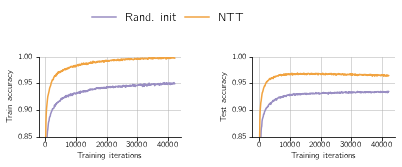

In [10]:
RECORD_ACC_FREQ = gen_kwargs_supervised['RECORD_ACC_FREQ']

fig, ax = plt.subplots(1, 2)

selected_density_list = ['0.03']

fig.subplots_adjust(left=.15, bottom=.3, right=.94, top=.75, wspace = 0.5)

plot_length = onp.arange(sup_learning_results_rand_init['train_results'][selected_density_list[0]].shape[1])

title_str = str(100 * round( 1 - onp.float32(selected_density_list[0]), 2)) + '\% sparse'

ax[0].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_rand_init['train_results'][selected_density_list[0]], axis = 0), label = 'Rand. init', color = '#998ec3', linestyle = '-',lw = 1.5)
ax[0].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_ntt_init['train_results'][selected_density_list[0]], axis = 0), ** gen_kwargs_ntt_student_plot)
ax[0].legend(loc='upper left', bbox_to_anchor= (0.3, 1.7), ncol= 2, columnspacing = 0.7, frameon=False, fontsize = 'large')

ax[0].grid(linestyle='-', linewidth='0.5')
ax[0].set_ylim([0.85, 1.0])
ax[0].set_yticks([0.85, 0.9, 0.95, 1.0])
ax[0].set_xlabel('Training iterations')

ax[0].set_ylabel('Train accuracy') 
ax[0] = simpleaxis(ax[0])


ax[1].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_rand_init['test_results'][selected_density_list[0]], axis = 0), label = 'Rand. init', color = '#998ec3', linestyle = '-',lw = 1.5)
ax[1].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_ntt_init['test_results'][selected_density_list[0]], axis = 0), ** gen_kwargs_ntt_student_plot)
ax[1].set_ylabel('Test accuracy') 

ax[1].set_ylim([0.85, 1.0])
ax[1].set_yticks([0.85, 0.9, 0.95, 1.0])

ax[1].set_xlabel('Training iterations')

ax[1].grid(linestyle='-', linewidth='0.5')
ax[1] = simpleaxis(ax[1])

fig.set_size_inches(two_fig_size['width'] ** 1.5, two_fig_size['height'] ** 3 )